In [14]:
import pandas as pd
import numpy as np
from factor_analyzer.utils import covariance_to_correlation
import graphviz
import semopy
import matplotlib.pyplot as plt
import seaborn as sns





In [2]:
data1 = pd.read_csv("image.csv", encoding='shift_jis')
data1

,x,d1,d2,d3,d4,d5,w1,w2,w3,w4,...,c4,c5,c6,p,s1,s2,s3,s4,s5,s6
0,1,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,21.00362,...,21,10,6,3,3.000000,3.000000,3.333333,3.000000,3.6,3.000000
1,2,11.0338,6.1047,7.2883,7.54295,9.90751,25.40064,16.89495,16.52988,16.46094,...,8,12,21,3,3.000000,3.000000,3.000000,3.000000,3.0,3.000000
2,3,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,20.50303,...,16,18,15,4,2.333333,2.333333,2.333333,3.666667,1.8,2.333333
3,4,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,17.58007,...,16,17,11,4,3.333333,3.333333,4.000000,2.666667,3.6,3.333333
4,5,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,25.27235,...,24,24,23,5,4.666667,3.333333,3.666667,5.000000,4.8,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,800,7.5822,0.1201,6.5722,3.32963,4.75933,22.04394,17.21857,11.89841,14.83118,...,19,18,11,4,3.000000,5.000000,4.666667,3.333333,4.8,5.000000
800,801,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,16.04473,...,18,24,10,4,2.000000,5.000000,4.333333,3.000000,5.0,5.000000
801,802,6.0455,2.0958,3.8635,4.97563,5.69270,28.18144,19.74430,19.20815,16.45026,...,16,11,21,2,3.666667,3.333333,3.000000,2.000000,3.4,4.000000
802,803,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,18.43385,...,26,17,6,4,4.000000,4.666667,5.000000,4.666667,5.0,4.333333


In [3]:
data1.columns

Index(['x', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1',
       'c2', 'c3', 'c4', 'c5', 'c6', 'p', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype='object')

In [4]:
df_dsq = data1[['d1', 'd2', 'd3', 'd4', 'd5']]
df_dsq

,d1,d2,d3,d4,d5
0,6.2937,1.9398,6.7618,3.07992,5.72156
1,11.0338,6.1047,7.2883,7.54295,9.90751
2,7.1932,2.1034,4.9684,5.66562,8.38533
3,7.8981,-0.9757,4.2858,3.84009,4.87743
4,9.7256,0.0349,7.1680,3.90703,6.30194
...,...,...,...,...,...
799,7.5822,0.1201,6.5722,3.32963,4.75933
800,5.6149,-0.7314,1.6795,3.74132,5.60217
801,6.0455,2.0958,3.8635,4.97563,5.69270
802,8.6738,-0.4216,1.4291,4.27503,5.49286


In [5]:
from scipy.cluster.hierarchy import linkage,dendrogram


In [6]:
df_linkage = linkage(df_dsq,'ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [5.0, 5.0, 31.25, 31.25],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [102.5, 102.5, 132.5, 132.5],
  [72.5, 72.5, 117.5, 117.5],
  [18.125, 18.125, 95.0, 95.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [160.0, 160.0, 191.25, 191.25],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [355.0, 355.0, 365.0, 365.0],
  [340.0, 340.0, 360.0, 360.0],
  [312.5, 312.5, 350.0, 350.

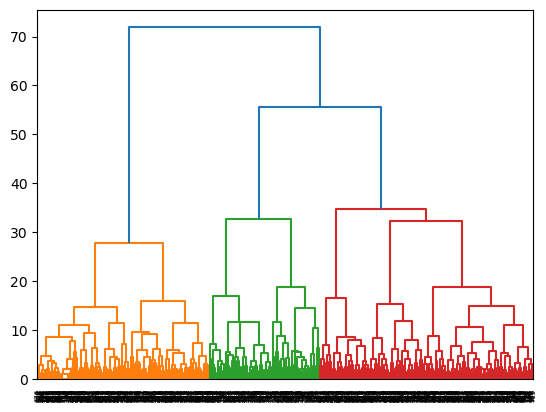

In [11]:
dendrogram(df_linkage)

In [26]:
np_dsq= np.array(df_dsq)
np_dsq

array([[ 6.2937 ,  1.9398 ,  6.7618 ,  3.07992,  5.72156],
       [11.0338 ,  6.1047 ,  7.2883 ,  7.54295,  9.90751],
       [ 7.1932 ,  2.1034 ,  4.9684 ,  5.66562,  8.38533],
       ...,
       [ 6.0455 ,  2.0958 ,  3.8635 ,  4.97563,  5.6927 ],
       [ 8.6738 , -0.4216 ,  1.4291 ,  4.27503,  5.49286],
       [ 3.5565 , -0.038  ,  3.4472 ,  2.81113,  3.50357]])

In [29]:
from sklearn.cluster import KMeans 
kmeans_3d = KMeans(n_clusters=3, random_state=10).fit(np_dsq)
labels_3d = kmeans_3d.labels_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_3d = pca.fit_transform(np_dsq)

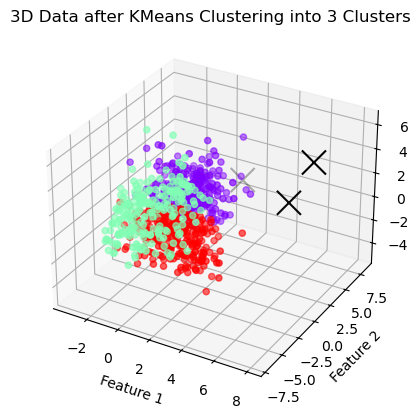

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 2], X_3d[:, 0], X_3d[:, 1], c=labels_3d, cmap='rainbow')
ax.scatter(kmeans_3d.cluster_centers_[:, 0], kmeans_3d.cluster_centers_[:, 1], kmeans_3d.cluster_centers_[:, 2], marker='x', s=300, c='black')
ax.set_title("3D Data after KMeans Clustering into 3 Clusters")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

In [38]:
!pip install k3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 8.5 MB/s eta 0:00:0000:0100:01


In [39]:
import k3d